<a href="https://colab.research.google.com/github/lucaslapazini95/pratica-com-pandas/blob/main/gastos_deputados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libs Install

In [ ]:
pip install gcsfs

In [ ]:
pip install pandera

#Libs Dec

In [ ]:
import pandas as pd
import os
import pandera as pa

#Start - pre-analysis

In [ ]:
df = pd.read_csv("https://storage.googleapis.com/igorgondimfreebuck/depsp.csv", sep=',')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,2015,300257,3,200.00,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
1,2015,300257,3,295.40,68064740000125,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,PAPER FACE COMERCIAL LTDA
2,2015,300257,3,2850.00,22145388877,ABELARDO CAMARINHA,N - MORADIA,LARA SERVINO VARGAS ABREU
3,2015,300257,4,100.00,10915883000113,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,CENTRO AUTOMOTIVO TOP 23 LTDA
4,2015,300257,4,195.01,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
...,...,...,...,...,...,...,...,...
542390,2007,300441,3,120.00,6306675000140.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",OPTEI EXPRESS LTDA.
542391,2007,300441,3,2096.80,52204617000122.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",CHURRASCARIA JANDA LTDA.
542392,2007,300441,3,13.48,62925474000282.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",ASSOCIAÇÃO FUNC.ASSEMB.LEG. EST.SÃO PAULO
542393,2007,300441,3,38.08,66747577000170.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",IBIZA EUROPEIA ALIMENTOS LTDA


In [ ]:
df.dtypes

Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

In [ ]:
df.count()

Ano           542395
Matricula     542395
Mes           542395
Valor         542395
CNPJ          531428
Deputado      542395
Tipo          542395
Fornecedor    542395
dtype: int64

In [ ]:
df.groupby(['Ano']).size().sort_values

<bound method Series.sort_values of Ano
2002    29586
2003    31173
2004    29338
2005    31894
2006    30928
2007    33202
2008    30155
2009    30421
2010    24266
2011    25152
2012    24964
2013    27928
2014    23333
2015    23171
2016    24141
2017    24820
2018    23104
2019    18849
2020    14039
2021    18981
2022    21564
2023     1386
dtype: int64>

In [ ]:
df.isna().sum()

Ano               0
Matricula         0
Mes               0
Valor             0
CNPJ          10967
Deputado          0
Tipo              0
Fornecedor        0
dtype: int64

In [ ]:
#filtro nulos
ftcnpj = df.CNPJ.isna()

In [ ]:
df.loc[ftcnpj]

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
855,2003,300439,3,192.6,NaN,ADILSON BARROSO,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
882,2003,300439,4,104.8,NaN,ADILSON BARROSO,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
920,2003,300439,5,154.8,NaN,ADILSON BARROSO,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
945,2003,300439,5,40.0,NaN,ADILSON BARROSO,K - LOCAÇÃO DE BENS MÓVEIS,TAXI
960,2003,300439,6,12.2,NaN,ADILSON BARROSO,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
...,...,...,...,...,...,...,...,...
542223,2006,300441,10,80.6,NaN,ÍTALO CARDOSO,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
542262,2006,300441,11,19.7,NaN,ÍTALO CARDOSO,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
542299,2006,300441,12,63.2,NaN,ÍTALO CARDOSO,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO
542326,2007,300441,1,14.6,NaN,ÍTALO CARDOSO,C - MATERIAIS E SERVIÇOS DE MANUT E CONSERV DE...,PEDÁGIO


#Schema validation

In [ ]:
df.dtypes

Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

In [ ]:
schema = pa.DataFrameSchema(
    columns = {
        'Ano':pa.Column(pa.Int),
        'Matricula':pa.Column(pa.Int),
        'Mes':pa.Column(pa.Int),
        'Valor':pa.Column(pa.Float),
        'CNPJ':pa.Column(pa.String,nullable=True),
        'Deputado':pa.Column(pa.String),
        'Tipo':pa.Column(pa.String),
        'Fornecedor':pa.Column(pa.String)
    }
)

In [ ]:
schema.validate(df)

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,2015,300257,3,200.00,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
1,2015,300257,3,295.40,68064740000125,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,PAPER FACE COMERCIAL LTDA
2,2015,300257,3,2850.00,22145388877,ABELARDO CAMARINHA,N - MORADIA,LARA SERVINO VARGAS ABREU
3,2015,300257,4,100.00,10915883000113,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,CENTRO AUTOMOTIVO TOP 23 LTDA
4,2015,300257,4,195.01,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
...,...,...,...,...,...,...,...,...
542390,2007,300441,3,120.00,6306675000140.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",OPTEI EXPRESS LTDA.
542391,2007,300441,3,2096.80,52204617000122.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",CHURRASCARIA JANDA LTDA.
542392,2007,300441,3,13.48,62925474000282.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",ASSOCIAÇÃO FUNC.ASSEMB.LEG. EST.SÃO PAULO
542393,2007,300441,3,38.08,66747577000170.0,ÍTALO CARDOSO,"I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCO...",IBIZA EUROPEIA ALIMENTOS LTDA


#Filter

In [ ]:
ftdeputados = df.Deputado

In [ ]:
ft4anos = (df.Ano >= 2020) & (df.Ano <=2023)

In [ ]:
ftgastos = df.Valor

#GroupBY

In [ ]:
#Fornecedores que mais lucraram
valor_por_fornecedor = df.groupby('Fornecedor')['Valor'].sum()

In [ ]:
maiores_lucros = valor_por_fornecedor.sort_values(ascending=False).head(5)

In [ ]:
maiores_lucros

Fornecedor
UNIDAS VEÍCULOS ESPECIAIS S.A.    3664253.77
TELEFONICA                        3224226.02
TELEFONICA BRASIL S.A.            3005516.94
TELEFÔNICA BRASIL S.A.            2324816.57
TELEFONICA BRASIL S.A             2306443.64
Name: Valor, dtype: float64

In [ ]:
#Gastos por deputado total
gastos_por_deputado_total = df.groupby('Deputado')['Valor'].sum()

In [ ]:
maiores_gastos = gastos_por_deputado_total.sort_values(ascending=False).head(3)

In [ ]:
menores_gastos = gastos_por_deputado_total.sort_values(ascending=True).head(3)

In [ ]:
maiores_gastos

Deputado
CAMPOS MACHADO       5691197.91
ENIO TATTO           5363451.90
MARIA LÚCIA AMARY    5297913.91
Name: Valor, dtype: float64

<AxesSubplot:xlabel='Tipo de Serviço', ylabel='Mi R$'>

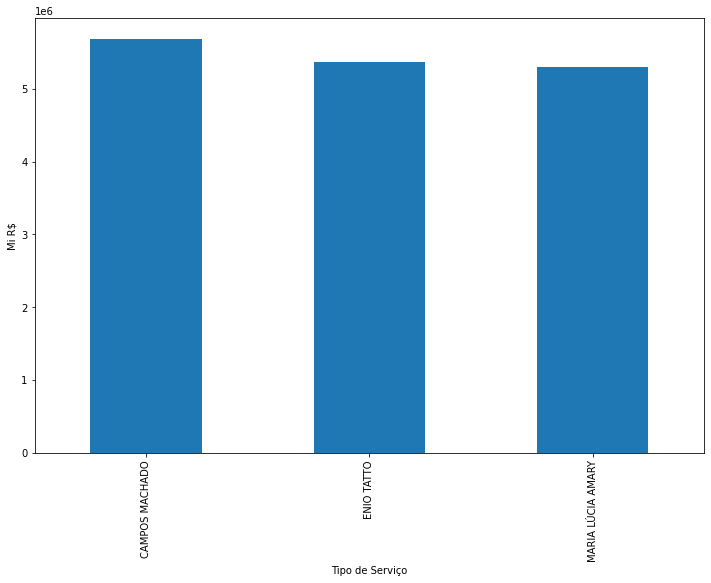

In [ ]:
maiores_gastos.sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Tipo de Serviço',ylabel='Mi R$')

In [ ]:
menores_gastos

Deputado
ANTÔNIO AGUIMARÃES DE CALDAS    2225.63
MAJOR MAURO                     2311.53
ULISSES SALES                   2653.53
Name: Valor, dtype: float64

<AxesSubplot:xlabel='Tipo de Serviço', ylabel='Mil R$'>

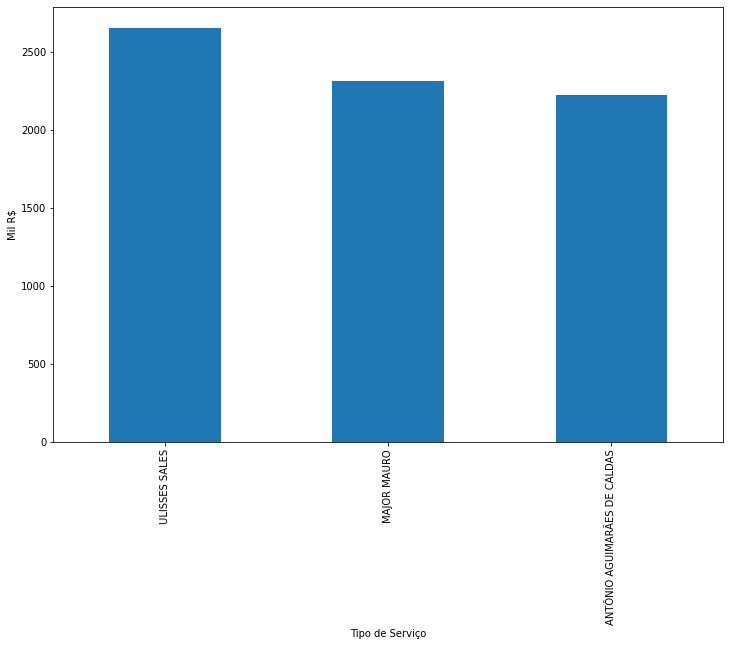

In [ ]:
menores_gastos.sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Tipo de Serviço',ylabel='Mil R$')

#Last 4 years

In [ ]:
df.dtypes

Ano             int64
Matricula       int64
Mes             int64
Valor         float64
CNPJ           object
Deputado       object
Tipo           object
Fornecedor     object
dtype: object

In [ ]:
df.head(4)

,Ano,Matricula,Mes,Valor,CNPJ,Deputado,Tipo,Fornecedor
0,2015,300257,3,200.0,71806251000106,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,AUTO POSTO DE SERVIÇOS MARV LTDA
1,2015,300257,3,295.4,68064740000125,ABELARDO CAMARINHA,E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS...,PAPER FACE COMERCIAL LTDA
2,2015,300257,3,2850.0,22145388877,ABELARDO CAMARINHA,N - MORADIA,LARA SERVINO VARGAS ABREU
3,2015,300257,4,100.0,10915883000113,ABELARDO CAMARINHA,A - COMBUSTÍVEIS E LUBRIFICANTES,CENTRO AUTOMOTIVO TOP 23 LTDA


In [ ]:
df4anos=df[df['Ano'] >= 2020]

In [ ]:
#Gastos por tipo
tipo4anos = df4anos.groupby('Tipo')

In [ ]:
total_tipo_4anos = tipo4anos['Valor'].sum()

In [ ]:
total_tipo_4anos.sort_values(ascending=False)

Tipo
L - LOCAÇÃO DE BENS IMÓVEIS                                           12358372.38
O - LOCAÇÃO DE VEÍCULO                                                10032134.38
D - MATERIAIS E SERVIÇOS GRÁFICOS, DE CÓPIAS  E REPRODUÇÃO DE DOCS     9361043.86
F - SERVIÇOS TÉCNICOS PROFISSIONAIS (CONSULTORIA, PESQUISAS ETC)       6634090.03
K - LOCAÇÃO DE BENS MÓVEIS                                             5994055.06
A - COMBUSTÍVEIS E LUBRIFICANTES                                       5182740.34
M - MANUTENÇÃO DE BENS MÓVEIS,  IMÓVEIS, CONDOMÍNIOS E OUTROS          2984804.38
H - SERV.UTIL.PÚBLICA (TELEF.MÓVEL/FIXA, ENERGIA, ÁGUA, GÁS ETC)       2774555.79
E - MATERIAIS DE ESCRITÓRIO E OUTROS MATERIAIS DE CONSUMO              2750755.02
I - HOSPEDAGEM, ALIMENTAÇÃO E DESPESAS DE LOCOMOÇÃO                    2100772.47
J - SERVIÇOS DE COMUNICAÇÃO                                            1954010.38
N - MORADIA                                                            1681115.46
P - DIVULGA

<AxesSubplot:xlabel='Tipo de Serviço', ylabel='Mi R$'>

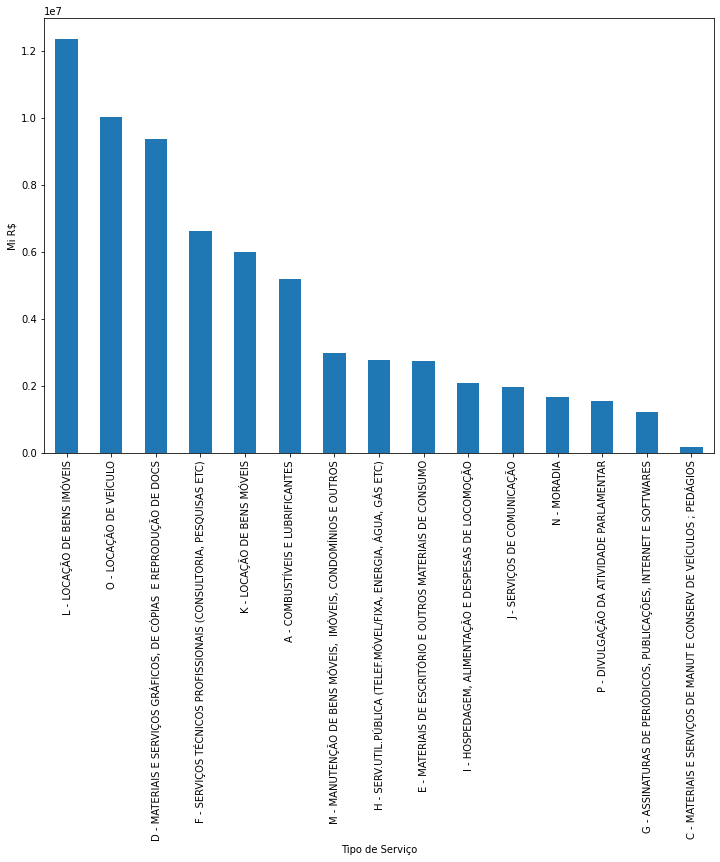

In [ ]:
total_tipo_4anos.sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Tipo de Serviço',ylabel='Mi R$')

In [ ]:
#Gastos por deputado
deps4anos = df4anos.groupby('Deputado')

In [ ]:
total_gasto_4anos=deps4anos['Valor'].sum()

In [ ]:
total_gasto_4anos

Deputado
ADALBERTO FREITAS              1122169.85
ADRIANA BORGO                   596620.09
AFONSO LOBATO                    68000.04
AGENTE FEDERAL DANILO BALAS    1181595.44
ALDO DEMARCHI                   292375.63
                                  ...    
TEONILIO BARBA                 1170167.50
THIAGO AURICCHIO                989442.73
VALERIA BOLSONARO               808169.23
VINÍCIUS CAMARINHA             1263959.28
WELLINGTON MOURA               1101063.33
Name: Valor, Length: 101, dtype: float64

In [ ]:
total_gasto_4anos.head(5).sort_values(ascending=False)

Deputado
AGENTE FEDERAL DANILO BALAS    1181595.44
ADALBERTO FREITAS              1122169.85
ADRIANA BORGO                   596620.09
ALDO DEMARCHI                   292375.63
AFONSO LOBATO                    68000.04
Name: Valor, dtype: float64

<AxesSubplot:xlabel='Deputado', ylabel='Mi R$'>

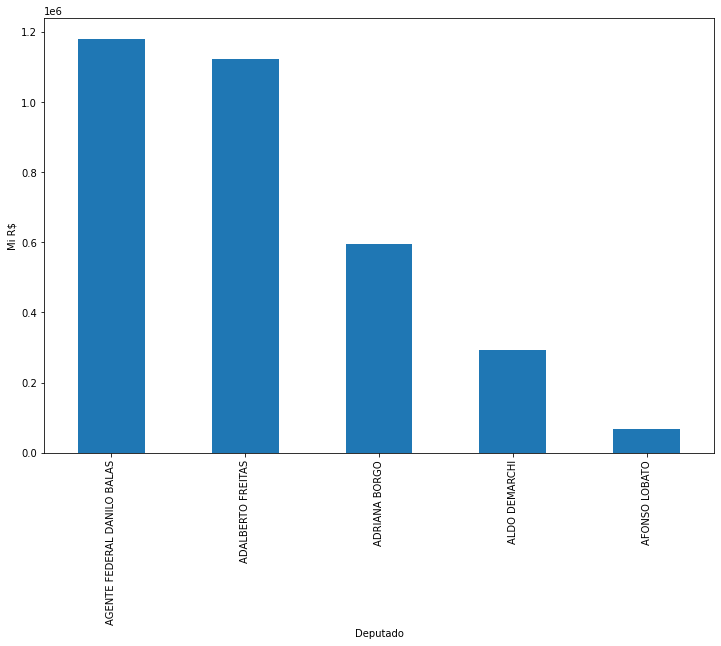

In [ ]:
total_gasto_4anos.head(5).sort_values(ascending=False).plot.bar(figsize=(12,8),xlabel='Deputado',ylabel='Mi R$')